In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


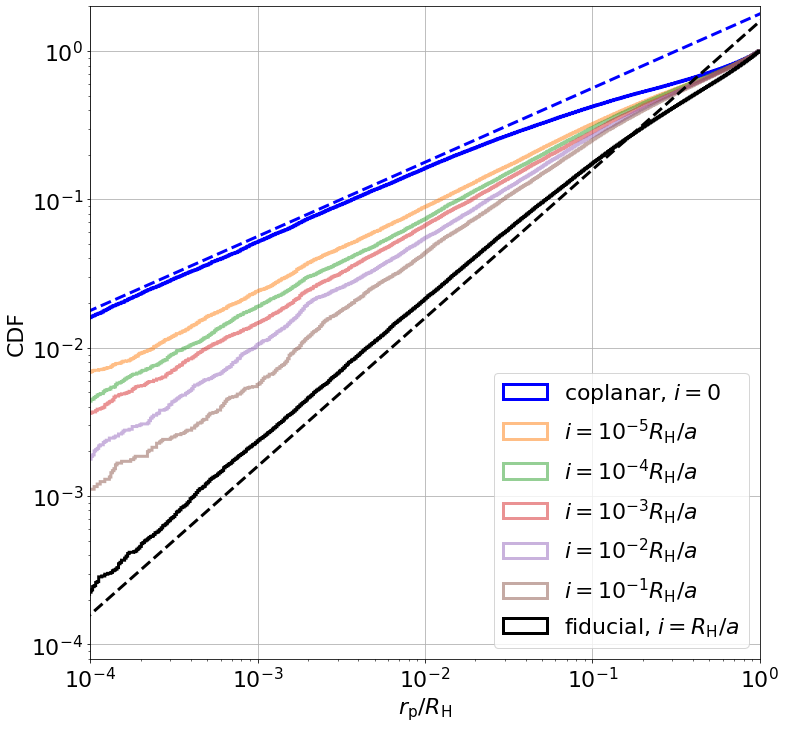

In [4]:
## 
##  Read the data for canonical runs
##

RH = (2e-5/3.)**(1./3.)

can_CE0 = np.load('./data/can_CE0-2000.npy')
can1_CE0 = np.load('./data/can-1_CE0.npy')
can2_CE0 = np.load('./data/can-2_CE0.npy')
can3_CE0 = np.load('./data/can-3_CE0.npy')
can4_CE0 = np.load('./data/can-4_CE0.npy')
can5_CE0 = np.load('./data/can-5_CE0.npy')
canf_CE0 = np.load('./data/can-flat_CE0.npy')





##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$r_{\rm p}/R_{\rm H}$')
axs.set_ylabel(r'CDF')

axs.set_xlim([1e-4,1e-0])
axs.set_ylim([0.8e-4,2])

axs.set_xscale('log')
axs.set_yscale('log')

# parameters of the plot

bin_use = 10**np.linspace(-9,0.1,1001)
aluse = .5
lw = 3



# plot the distribution of rp

eta = canf_CE0[:,3] * (1-canf_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         label=r'coplanar, $i=0$',edgecolor='b',histtype='step')


eta = can5_CE0[:,3] * (1-can5_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
        label=r'$i=10^{-5}R_{\rm H}/a$',alpha=aluse,histtype='step')

eta = can4_CE0[:,3] * (1-can4_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
        label=r'$i=10^{-4}R_{\rm H}/a$',alpha=aluse,histtype='step')

eta = can3_CE0[:,3] * (1-can3_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
        label=r'$i=10^{-3}R_{\rm H}/a$',alpha=aluse,histtype='step')

eta = can2_CE0[:,3] * (1-can2_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
        label=r'$i=10^{-2}R_{\rm H}/a$',alpha=aluse,histtype='step')

eta = can1_CE0[:,3] * (1-can1_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
        label=r'$i=10^{-1}R_{\rm H}/a$',alpha=aluse,histtype='step')


eta = can_CE0[:,3] * (1-can_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         label=r'fiducial, $i=R_{\rm H}/a$',edgecolor='k',histtype='step')

# plot the analytical distribution

x2 = bin_use
Nx2 = np.sqrt(x2)
Nx2 = Nx2/Nx2[-1]*2.
#axs.plot(x2, Nx2,'b',alpha=0.3, linewidth=20)#,label=r'$\propto \sqrt{r_{\rm p}}$ (uniform $\ell$ )')
axs.plot(x2, Nx2,'b--',alpha=1., linewidth=lw)

x1 = bin_use
Nx1 = x1
Nx1 = Nx1/Nx1[-1]*2.
#axs.plot(x1, Nx1,'g',alpha=0.3, linewidth=20)#,label=r'$\propto r_{\rm p}$ (linear $\ell$ )')
axs.plot(x1, Nx1,'k--',alpha=1., linewidth=lw)

##  Save the figure
axs.legend(loc=4,ncol=1)
axs.grid()
axs.set_axisbelow(True)

plt.savefig('./pics/pics-CDF-rp-inc.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-CDF-rp-inc.png',bbox_inches='tight',transparent=True)
